# 여행객성향에 따른 제주도 여행지 10곳 추천

In [1]:
!pip install pandas==1.5.2
!pip install scikit-learn
!pip install tqdm
!pip install catboost

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore') #warning 문구 제거
traveller = pd.read_csv("tn_traveller_master_여행객 Master_제주_final.csv")
visit_area = pd.read_csv("tn_visit_area_info_방문지정보_제주_final.csv")
travel = pd.read_csv("tn_travel_여행_제주_final.csv")

In [3]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32697 non-null  float64
 9   Y_COORD              32697 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

In [4]:
traveller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                2493 non-null   object 
 1   RESIDENCE_SGG_CD           2493 non-null   int64  
 2   GENDER                     2493 non-null   object 
 3   AGE_GRP                    2493 non-null   int64  
 4   EDU_NM                     2493 non-null   int64  
 5   EDU_FNSH_SE                2493 non-null   float64
 6   MARR_STTS                  2493 non-null   float64
 7   FAMILY_MEMB                2493 non-null   int64  
 8   JOB_NM                     2415 non-null   float64
 9   JOB_ETC                    78 non-null     float64
 10  INCOME                     2493 non-null   int64  
 11  HOUSE_INCOME               1767 non-null   float64
 12  TRAVEL_TERM                2493 non-null   int64  
 13  TRAVEL_NUM                 2493 non-null   int64

In [5]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32697 non-null  float64
 9   Y_COORD              32697 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

## visit_area(방문지 정보)전처리

### 방문지 x좌표 y좌표 결측치확인 및 처리

In [6]:
visit_area[visit_area['X_COORD'].isna()]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD,SI
1647,2210080001,d_d003290,1,친구/친지집,2022-10-08,2022-10-08,제주특별자치도 서귀포시 대청로 37,제주특별자치도 서귀포시 강정동 208-5,NaN,NaN,...,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,50110.0,서귀포
4001,2208060005,d_d000033,13,숙소,2022-08-06,2022-08-07,제주 제주시 애월읍 애월해안로 566 라온빌리지,제주특별자치도 제주시 애월읍,NaN,NaN,...,390.0,24,Y,2.0,11.0,5.0,5.0,5.0,50110.0,제주
20665,2210080001,d_d003681,1,친구/친지집,2022-10-08,2022-10-08,제주특별자치도 제주시 도령로 127-2,제주특별자치도 제주시 연동 2333-7,NaN,NaN,...,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,제주
21104,2210130001,d_d003636,1,친구/친지집,2022-10-13,2022-10-13,제주특별자치도 서귀포시 일주동로 8610,제주특별자치도 서귀포시 동홍동 465-11,NaN,NaN,...,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서귀포
23718,2208220004,d_d000175,4,에스제이렌트카,2022-08-22,2022-08-22,제주 제주시 오일장중길 100 A동 에스제이렌트카,제주특별자치도 제주시 도두일동,NaN,NaN,...,30.0,10,N,11.0,NaN,5.0,5.0,5.0,50110.0,제주


#### 결측치 5개이므로 직접 채워넣음

In [7]:
visit_area.loc[1647, 'X_COORD'] = 126.5038
visit_area.loc[1647, 'Y_COORD'] = 33.2527

In [8]:
visit_area.loc[4001, 'X_COORD'] = 126.3642
visit_area.loc[4001, 'Y_COORD'] = 33.4777

In [9]:
visit_area.loc[20665, 'X_COORD'] = 126.4907
visit_area.loc[20665, 'Y_COORD'] = 33.4931

In [10]:
visit_area.loc[21104, 'X_COORD'] = 126.5685
visit_area.loc[21104, 'Y_COORD'] = 33.2549

In [11]:
visit_area.loc[23718, 'X_COORD'] = 126.4770
visit_area.loc[23718, 'Y_COORD'] = 33.4984

In [12]:
visit_area[visit_area['Y_COORD'].isna()]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD,SI


### 세부주소 'Dong_Eup'만들기

In [13]:
import pandas as pd

visit_area['Dong_Eup'] = ''
visit_area['Dong_Eup'] = visit_area['LOTNO_ADDR'].str.split().str[2]

print(visit_area[['LOTNO_ADDR', 'Dong_Eup']])

                        LOTNO_ADDR Dong_Eup
0            제주특별자치도 제주시 노형동 904-4      노형동
1            제주특별자치도 제주시 용담2동 2002     용담2동
2            제주특별자치도 제주시 용담2동 2002     용담2동
3            제주특별자치도 제주시 용담2동 2002     용담2동
4            제주특별자치도 제주시 용담2동 2002     용담2동
...                            ...      ...
32697     제주특별자치도 제주시 이도이동 1768-16     이도이동
32698     제주특별자치도 제주시 한림읍 협재리 1398      한림읍
32699        제주특별자치도 제주시 용담이동 2002     용담이동
32700  제주특별자치도 서귀포시 남원읍 남원리 2384-1      남원읍
32701   제주특별자치도 서귀포시 성산읍 삼달리 437-5      성산읍

[32702 rows x 2 columns]


In [14]:
visit_area[visit_area['Dong_Eup'].isna()]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD,SI,Dong_Eup


In [15]:
visit_area['Dong_Eup'].unique()

array(['노형동', '용담2동', '영평동', '삼도2동', '일도이동', '이도이동', '용담이동', '한림읍', '월평동',
       '구좌읍', '건입동', '애월읍', '도두일동', '서호동', '중문동', '조천읍', '상효동', '아라일동',
       '남원읍', '연동', '상예동', '안덕면', '서귀동', '성산읍', '오라이동', '이도일동', '대정읍',
       '색달동', '보목동', '해안동', '한경면', '용담삼동', '삼도일동', '우도면', '이호일동', '삼도이동',
       '표선면', '토평동', '동홍동', '서홍동', '이호이동', '도두이동', '호근동', '외도일동', '하예동',
       '일도2동', '회수동', '일도1동', '삼양일동', '내도동', '법환동', '일도일동', '대포동', '강정동',
       '이도2동', '하효동', '신효동', '아라이동', '회천동', '하원동', '용담일동', '이도1동', '도남동',
       '화북이동', '화북일동', '오라일동', '봉개동', '오라삼동', '삼도1동', '용담1동', '용강동',
       '오등동', '영남동', '외도이동', '도련일동', '삼양이동', '중앙동', '삼양동', '천지동', '도련이동',
       '정방동', '도순동', '도평동', '삼양삼동', '예래동', '도두동'], dtype=object)

In [16]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32702 non-null  float64
 9   Y_COORD              32702 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

### 방문지유형코드 1~8만 남기기

In [17]:
filtered_rows = visit_area[visit_area['VISIT_AREA_TYPE_CD'] < 9]
unique_values = filtered_rows['VISIT_AREA_NM'].unique()
print(len(unique_values))

1051


In [18]:
filtered_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 33 to 32701
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        7125 non-null   int64  
 1   TRAVEL_ID            7125 non-null   object 
 2   VISIT_ORDER          7125 non-null   int64  
 3   VISIT_AREA_NM        7125 non-null   object 
 4   VISIT_START_YMD      7125 non-null   object 
 5   VISIT_END_YMD        7125 non-null   object 
 6   ROAD_NM_ADDR         7125 non-null   object 
 7   LOTNO_ADDR           7125 non-null   object 
 8   X_COORD              7125 non-null   float64
 9   Y_COORD              7125 non-null   float64
 10  ROAD_NM_CD           0 non-null      float64
 11  LOTNO_CD             144 non-null    object 
 12  POI_ID               4490 non-null   object 
 13  POI_NM               4490 non-null   object 
 14  RESIDENCE_TIME_MIN   7125 non-null   float64
 15  VISIT_AREA_TYPE_CD   7125 non-null  

### 만족도, 재방문의향, 추천의향 결측치확인 및 처리

In [19]:
len(filtered_rows[filtered_rows['DGSTFN'].isna() & filtered_rows['REVISIT_INTENTION'].isna() & filtered_rows['RCMDTN_INTENTION'].isna()])

2

In [20]:
filtered_rows = filtered_rows.dropna(subset = ['DGSTFN'])
filtered_rows.reset_index(drop=True, inplace=True)

In [21]:
filtered_rows[filtered_rows['DGSTFN'].isna() & filtered_rows['REVISIT_INTENTION'].isna() & filtered_rows['RCMDTN_INTENTION'].isna()]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD,SI,Dong_Eup


## traveller(방문객정보) 전처리

### INCOME값 0,1로 라벨링

In [22]:
print(len(traveller['INCOME']<4))

2493


In [23]:
import numpy as np

traveller['INCOME'] = np.where(traveller['INCOME'] >= 5, 1, 0)
print(len(traveller['INCOME']==0))

2493


## travel(여행정보)전처리

### 'TRAVEL_MISSION_CHECK'값을 'TRAVEL_MISSION_PRIORITY'로 변환

In [24]:
travel_list = []
for i in range(len(travel)):
    value = int(travel['TRAVEL_MISSION_CHECK'][i].split(';')[0])
    travel_list.append(value)
travel['TRAVEL_MISSION_PRIORITY'] = travel_list

## travel, traveller, visit_area을 df로 병합

In [25]:
travel_puri = travel[['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_MISSION_PRIORITY']]
traveller_puri = traveller[['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 
                                     'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 
                                     'TRAVEL_STYL_6', 'TRAVEL_STYL_7','TRAVEL_STYL_8', 
                                      'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM' ]]
visit_area_puri = filtered_rows[['TRAVEL_ID', 'VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD', 'DGSTFN',
                                  'REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN', 'REVISIT_YN']]

In [26]:
df = pd.merge(travel_puri, traveller_puri, left_on = 'TRAVELER_ID', right_on = 'TRAVELER_ID', how = 'inner')

In [27]:
df = pd.merge(visit_area_puri, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'left')

In [28]:
len(df['TRAVEL_ID'].unique())

2203

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7122
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAVEL_ID                7123 non-null   object 
 1   VISIT_AREA_NM            7123 non-null   object 
 2   SI                       7123 non-null   object 
 3   Dong_Eup                 7123 non-null   object 
 4   VISIT_AREA_TYPE_CD       7123 non-null   int64  
 5   DGSTFN                   7123 non-null   float64
 6   REVISIT_INTENTION        7123 non-null   float64
 7   RCMDTN_INTENTION         7123 non-null   float64
 8   RESIDENCE_TIME_MIN       7123 non-null   float64
 9   REVISIT_YN               7123 non-null   object 
 10  TRAVELER_ID              7123 non-null   object 
 11  TRAVEL_MISSION_PRIORITY  7123 non-null   int64  
 12  GENDER                   7123 non-null   object 
 13  AGE_GRP                  7123 non-null   int64  
 14  INCOME                  

In [30]:
df['REVISIT_YN'] = df['REVISIT_YN'].replace("N",0)
df['REVISIT_YN'] = df['REVISIT_YN'].replace("Y",1)

In [31]:
df['REVISIT_YN'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7123 entries, 0 to 7122
Series name: REVISIT_YN
Non-Null Count  Dtype
--------------  -----
7123 non-null   int64
dtypes: int64(1)
memory usage: 111.3 KB


## 방문장소에 대한 만족,추천을 새로운 수치(new_variable)로 만듦

### 만족도('DGSTFN')의 편향성

In [32]:
merged_df = df

In [33]:
import pandas as pd

mean_df = merged_df.groupby('TRAVEL_ID')['DGSTFN'].mean().reset_index()

print(f'모든 여행지에 5점을 부여한 사람의 비율 : {len(mean_df[mean_df["DGSTFN"]==5])/len(mean_df)}')

모든 여행지에 5점을 부여한 사람의 비율 : 0.271448025419882


전체 응답자 중 27%가 여행지 만족도를 모두 5점으로 평가하였다. 이러한 높은 비율은 편향성을 나타내며, 만족도 평가의 다양성을 반영하기 위해 새로운 변수를 도입

### 'DGSTFN'과 상관관계가 높은 항목 찾기

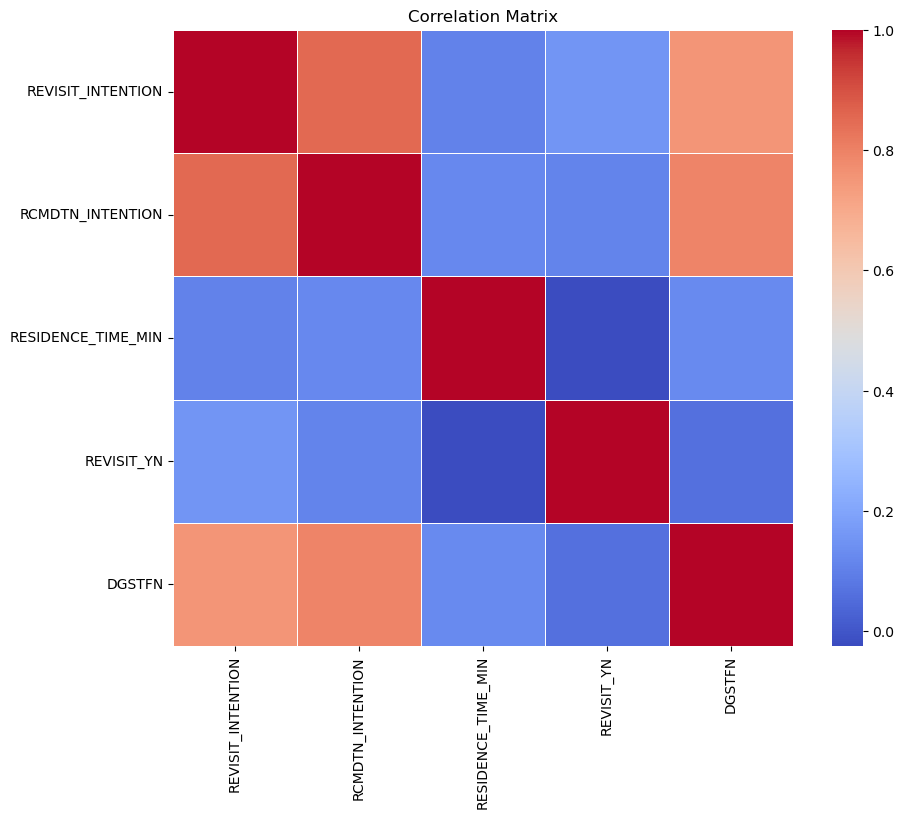

                    REVISIT_INTENTION  RCMDTN_INTENTION  RESIDENCE_TIME_MIN  \
REVISIT_INTENTION            1.000000          0.855723            0.104635   
RCMDTN_INTENTION             0.855723          1.000000            0.120176   
RESIDENCE_TIME_MIN           0.104635          0.120176            1.000000   
REVISIT_YN                   0.152931          0.109542           -0.024454   
DGSTFN                       0.754309          0.795184            0.124800   

                    REVISIT_YN    DGSTFN  
REVISIT_INTENTION     0.152931  0.754309  
RCMDTN_INTENTION      0.109542  0.795184  
RESIDENCE_TIME_MIN   -0.024454  0.124800  
REVISIT_YN            1.000000  0.063251  
DGSTFN                0.063251  1.000000  


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_df[['REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN', 'REVISIT_YN', 'DGSTFN']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

DGSTFN, RCMDTN_INTENTION, REVISIT_INTENTION이 상관관계가 높음

### 'DGSTFN','REVISIIT_INTENTION','RCMDTN_INTENTION'을 방문객별 'DGSTFN','REVISIIT_INTENTION','RCMDTN_INTENTION' 평균으로 나눔

In [35]:
Id_lst = merged_df['TRAVEL_ID'].unique()

In [36]:
merged_df1 = merged_df
import pandas as pd

merged_df1['DGSTFN'] = pd.to_numeric(merged_df1['DGSTFN'], errors='coerce')

for id in Id_lst:
    group_id = merged_df1[merged_df1['TRAVEL_ID'] == id]
    group_id_mean = group_id['DGSTFN'].mean()
    revisit_mean = group_id['REVISIT_INTENTION'].mean()
    rcmdtn_mean = group_id['RCMDTN_INTENTION'].mean()
    
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'DGSTFN_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'DGSTFN'] / group_id_mean
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'REVISIT_INTENTION_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 
    'REVISIT_INTENTION'] / revisit_mean
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'RCMDTN_INTENTION_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 
    'RCMDTN_INTENTION'] / rcmdtn_mean

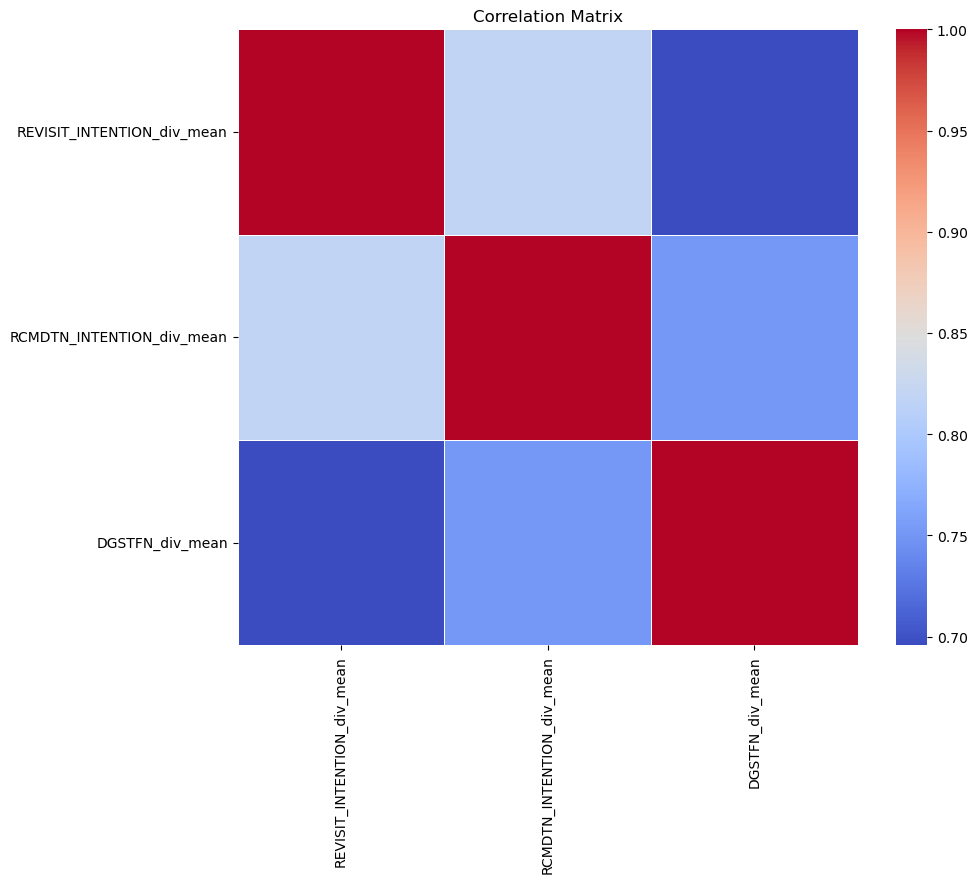

                            REVISIT_INTENTION_div_mean  \
REVISIT_INTENTION_div_mean                    1.000000   
RCMDTN_INTENTION_div_mean                     0.818405   
DGSTFN_div_mean                               0.695637   

                            RCMDTN_INTENTION_div_mean  DGSTFN_div_mean  
REVISIT_INTENTION_div_mean                   0.818405         0.695637  
RCMDTN_INTENTION_div_mean                    1.000000         0.751192  
DGSTFN_div_mean                              0.751192         1.000000  


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_df[['REVISIT_INTENTION_div_mean', 'RCMDTN_INTENTION_div_mean', 'DGSTFN_div_mean']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

In [38]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7122
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   7123 non-null   object 
 1   VISIT_AREA_NM               7123 non-null   object 
 2   SI                          7123 non-null   object 
 3   Dong_Eup                    7123 non-null   object 
 4   VISIT_AREA_TYPE_CD          7123 non-null   int64  
 5   DGSTFN                      7123 non-null   float64
 6   REVISIT_INTENTION           7123 non-null   float64
 7   RCMDTN_INTENTION            7123 non-null   float64
 8   RESIDENCE_TIME_MIN          7123 non-null   float64
 9   REVISIT_YN                  7123 non-null   int64  
 10  TRAVELER_ID                 7123 non-null   object 
 11  TRAVEL_MISSION_PRIORITY     7123 non-null   int64  
 12  GENDER                      7123 non-null   object 
 13  AGE_GRP                     7123 

In [39]:
merged_df1['DGSTFN_div_mean'].value_counts()

1.000000    2379
1.111111     367
0.888889     258
1.052632     245
0.923077     219
            ... 
1.076923       1
0.509804       1
0.437500       1
1.600000       1
1.323529       1
Name: DGSTFN_div_mean, Length: 206, dtype: int64

### 'DGSTFN_div_mean','REVISIT_INTENTION_div_mean','RCMDTN_INTENTION_div_mean'값 분포확인

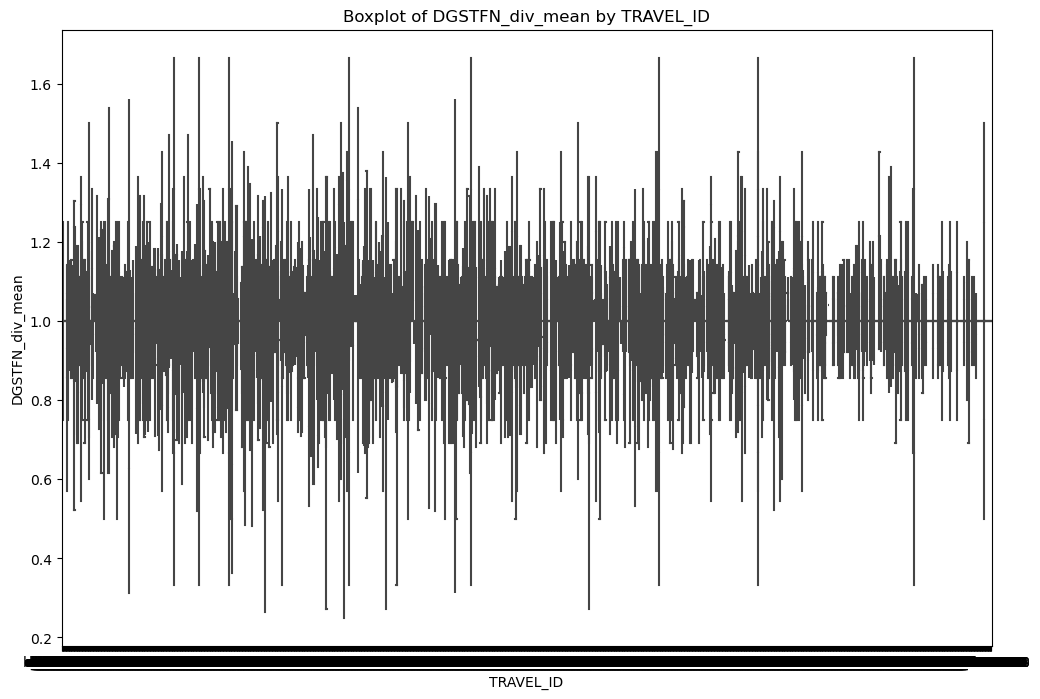

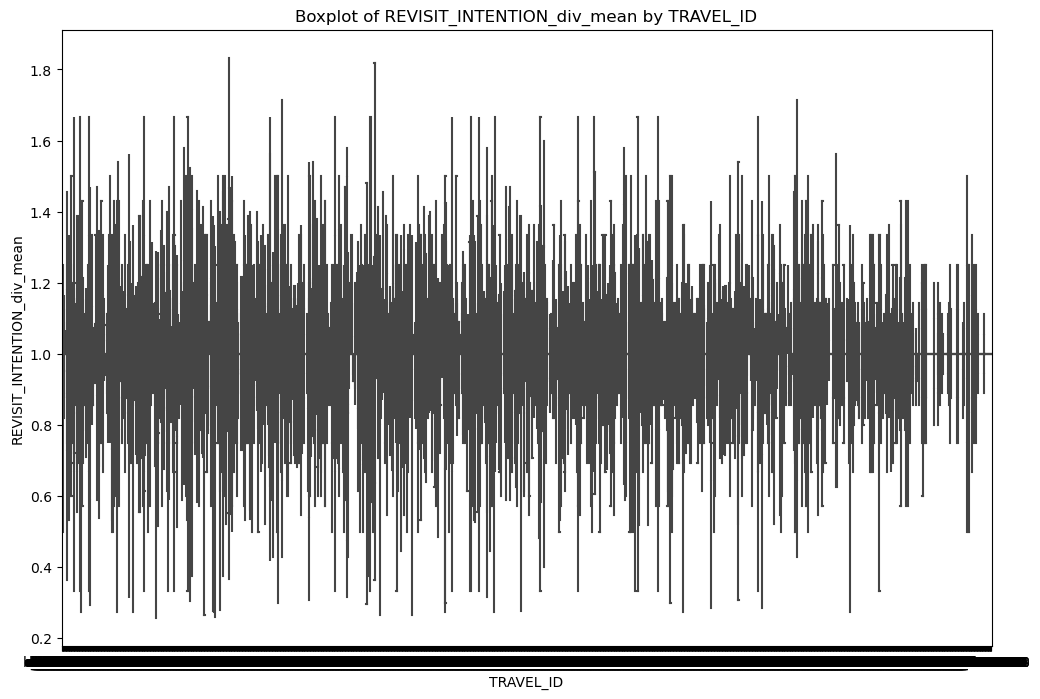

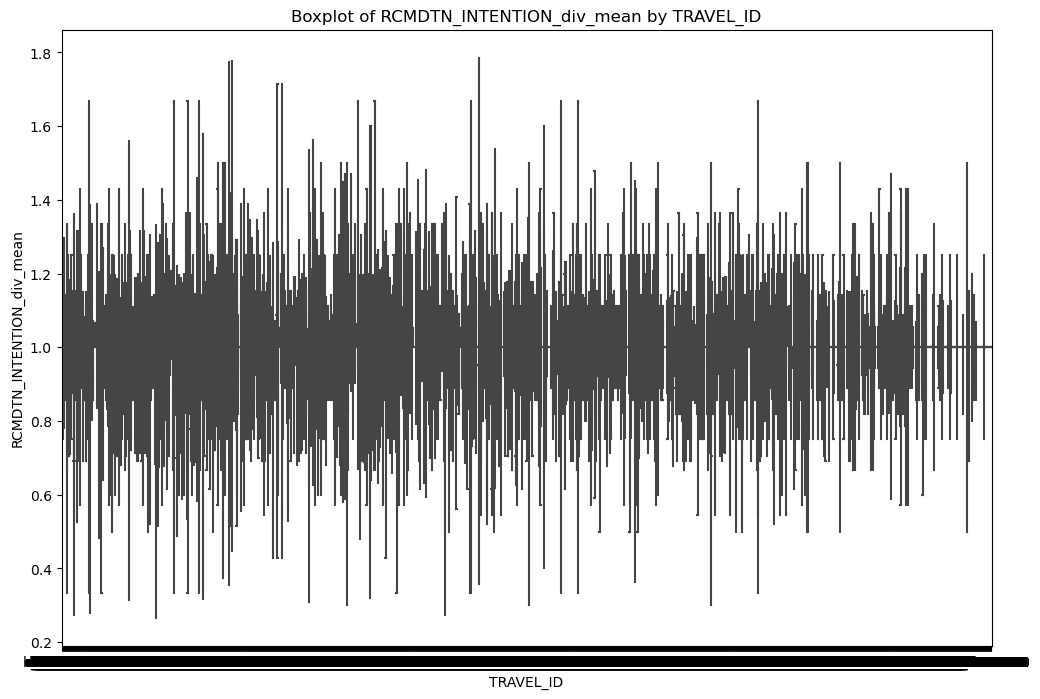

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

tmplst=['DGSTFN','REVISIT_INTENTION','RCMDTN_INTENTION']

for tmp in tmplst:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='TRAVEL_ID', y=f'{tmp}_div_mean', data=merged_df1, showfliers=False)
    plt.title(f'Boxplot of {tmp}_div_mean by TRAVEL_ID')
    plt.show()

In [41]:
merged_df1[['RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean']].corr()

,RCMDTN_INTENTION_div_mean,REVISIT_INTENTION_div_mean,DGSTFN_div_mean
RCMDTN_INTENTION_div_mean,1.000000,0.818405,0.751192
REVISIT_INTENTION_div_mean,0.818405,1.000000,0.695637
DGSTFN_div_mean,0.751192,0.695637,1.000000


### 'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean'을 PCA(차원축소)을 사용하여 새로운 수치(new_variable)생성

In [42]:
from sklearn.decomposition import PCA
import pandas as pd

selected_columns = ['RCMDTN_INTENTION_div_mean', 'REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean']
selected_df = merged_df1[selected_columns]

pca = PCA(n_components=1)
new_variable = pca.fit_transform(selected_df)

merged_df1['new_variable'] = new_variable

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.84915999]


### VIF확인

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_variables = selected_df.copy()

vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

                     Variable         VIF
0   RCMDTN_INTENTION_div_mean  123.051845
1  REVISIT_INTENTION_div_mean   80.878491
2             DGSTFN_div_mean   79.238538


### 모델 검증

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = merged_df1[['RCMDTN_INTENTION_div_mean', 'REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean', 'new_variable']]
y = merged_df1['DGSTFN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.28774668896092287
R-squared: 0.5154625739102996


VIF값이 상당히 높다. VIF값이 높은 항목 삭제 후 다시 PCA진행

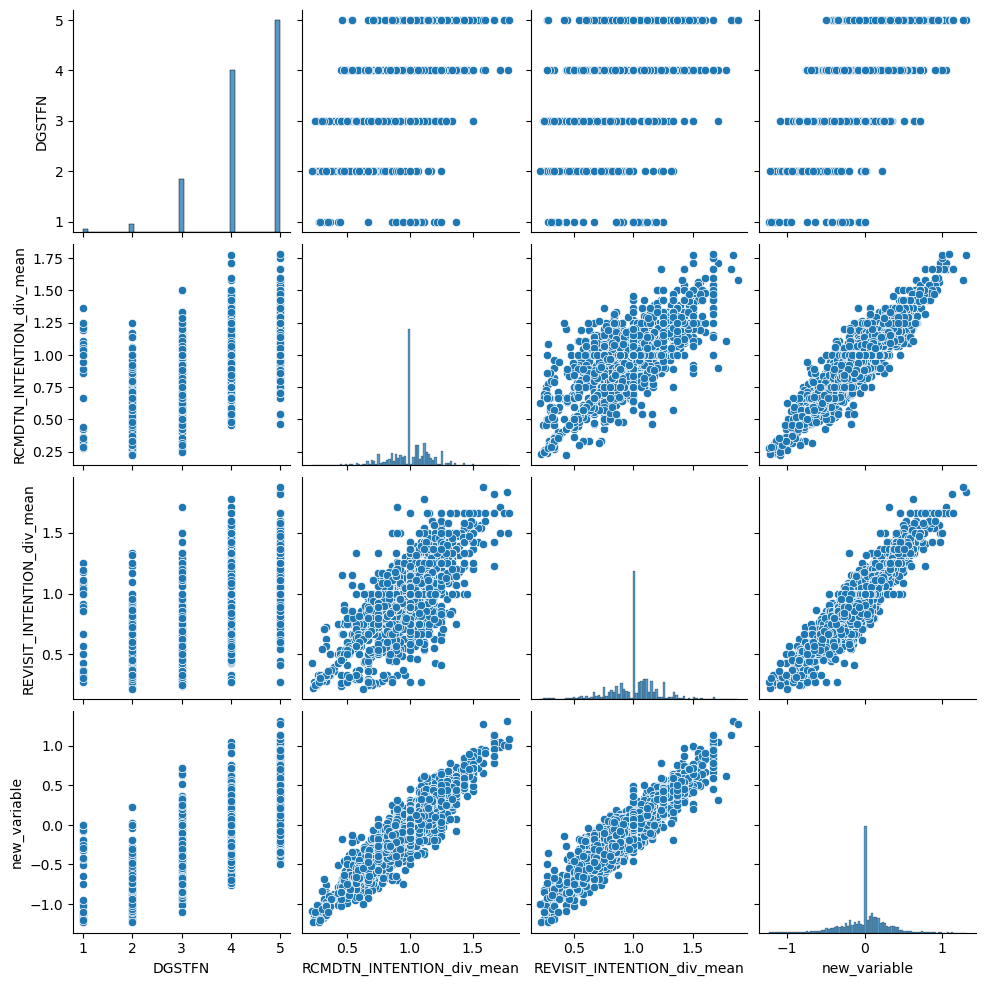

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(merged_df1[['DGSTFN', 'RCMDTN_INTENTION_div_mean', 'REVISIT_INTENTION_div_mean', 'new_variable']])
plt.show()

### VIF를 줄이기 위해 VIF가 높게 나온 항목삭제 후 다시 VIF확인

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_result = calculate_vif(selected_df)

selected_df_reduced = selected_df.drop(['RCMDTN_INTENTION_div_mean'], axis=1)

print(selected_df_reduced.info())

vif_result_reduced = calculate_vif(selected_df_reduced)

print("Original VIF:")
print(vif_result)
print("\nVIF After Variable Reduction:")
print(vif_result_reduced)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7122
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   REVISIT_INTENTION_div_mean  7123 non-null   float64
 1   DGSTFN_div_mean             7123 non-null   float64
dtypes: float64(2)
memory usage: 166.9 KB
None
Original VIF:
                     Variable         VIF
0   RCMDTN_INTENTION_div_mean  123.051845
1  REVISIT_INTENTION_div_mean   80.878491
2             DGSTFN_div_mean   79.238538

VIF After Variable Reduction:
                     Variable        VIF
0  REVISIT_INTENTION_div_mean  49.384049
1             DGSTFN_div_mean  49.384049


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
new_variable_pca = pca.fit_transform(selected_df_reduced)

#selected_df_reduced['new_variable_pca'] = new_variable_pca
merged_df1['new_variable_renewed'] = new_variable_pca

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = merged_df1[['REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean', 'new_variable_renewed']]
y = merged_df1['DGSTFN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.28777397082823897
R-squared: 0.5154166339002998


'REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean'만을 이용해 PCA를 사용해 변수를 만들었음. 전보다 다중공선성을 줄일 수 있는 장점이 있다.

In [49]:
merged_df1['new_variable_renewed']

0       1.595677e-19
1       0.000000e+00
2      -5.559360e-01
3       6.018640e-02
4       1.604971e-01
            ...     
7118    0.000000e+00
7119    0.000000e+00
7120    1.534594e-01
7121   -2.180739e-01
7122   -9.362329e-02
Name: new_variable_renewed, Length: 7123, dtype: float64

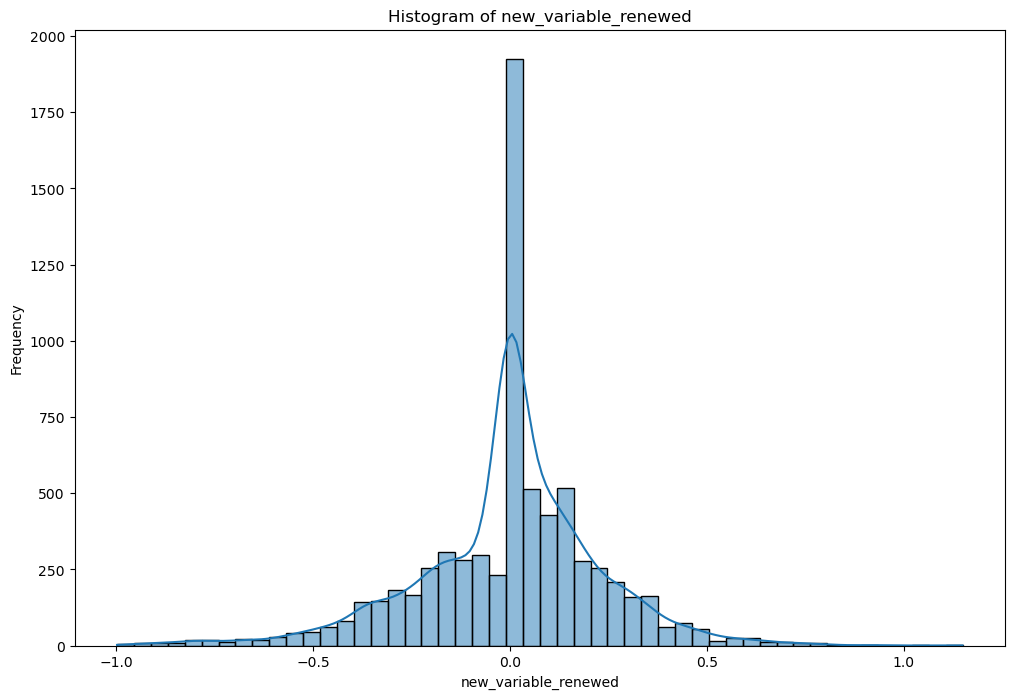

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(merged_df1['new_variable_renewed'], bins=50, kde=True)
plt.title('Histogram of new_variable_renewed')
plt.xlabel('new_variable_renewed')
plt.ylabel('Frequency')
plt.show()

### 'new_variable_renewed'의 -0.1이상 값의 퍼센트 확인

In [51]:
len(merged_df1[merged_df1['new_variable_renewed']>=-0.1])/len(merged_df1['new_variable_renewed'])

0.7443492910290608

## Train-Test split

- 유니크한 관광지 정보가 모두 train set에 있어야 한다. (train set에 한라산이 없고 test set에만 한라산이 있으면 안된다. 왜냐하면 방문지 변수가 있기 때문에 입력되지 않은 방문지에 대한 정보는 모델이 학습할 수 없기 때문이다.)
- 또한 새로운 유저에 대한 추측이기 때문에 유저 데이터는 무조건 train / test 중 한 곳에만 있다. (유저 A의 ㄱ관광지는 train, ㄴ관광지는 test 에 있을 수 없다.)

In [52]:
df = merged_df1

In [53]:
from tqdm import tqdm
import numpy as np

df1 = df
Train = None  # 초기값을 None으로 설정

for i in tqdm(list(df['VISIT_AREA_NM'].unique())): # 유니크한 관광지 목록 중에서
    df2 = df1[df1['VISIT_AREA_NM'] == i] # 특정 관광지에 간 모든 사람 뽑아서
    np.random.seed(42)
    if df2.empty:
        pass
    else:
        random_number = np.random.randint(len(df2)) 
        df_id = df2.iloc[[random_number]] # 그 중 랜덤으로 관광지에 간 사람 한 명 뽑아서
        index = df_id.iloc[0,0]
        df3 = df1[df1['TRAVEL_ID'] == index] # 그 사람이 간 모든 관광지를 구해서

        if Train is None:
            Train = df3.copy()  # 초기값이 None일 경우, df3를 복사하여 할당
        else:
            Train = pd.concat([Train, df3], ignore_index=True)  # 이미 Train이 존재하면 concat으로 데이터를 추가

        df1 = pd.merge(df3, df1, how='outer', indicator=True)
        df1 = df1.query('_merge =="right_only"').drop(columns=['_merge']) # 기존 데이터프레임에서 그 사람 내용을 삭제


100%|██████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:35<00:00, 29.59it/s]


### Train, Test 이 8:2 비율이 되도록 조정

In [54]:
while len(df1) / len(df) > 0.2:
    np.random.seed(42)
    random_number = np.random.randint(len(df1))
    df_id = df1.iloc[[random_number]]
    index = df_id.iloc[0, 0]
    df3 = df1[df1['TRAVEL_ID'] == index]
    df1 = pd.merge(df3, df1, how='outer', indicator=True)
    df1 = df1.query('_merge =="right_only"').drop(columns=['_merge'])

    if Train is None:
        Train = pd.DataFrame(columns=list(df.columns))
    
    Train = pd.concat([Train, df3], ignore_index=True)

In [55]:
print(len(Train)) # train set 길이
print(len(df1)) # test set 길이
print(len(df))
print(len(df1) / len(df))

5700
1423
7123
0.19977537554401237


In [56]:
len(df1['TRAVEL_ID'].unique())

679

In [57]:
len(Train['TRAVEL_ID'].unique())

1524

### 새로운 변수 항목으로 방문지마다 체류시간 평균, 재방문여부의 평균, 동반자 수의 평균 산출

In [58]:
new_train = pd.DataFrame(columns = list(Train.columns) + ['RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean'])

for i in tqdm(list(Train['VISIT_AREA_NM'].unique())): #유니크한 관광지 목록 중에서
    df2 = Train[Train['VISIT_AREA_NM'] == i] # 특정 관광지에 간 모든 사람 뽑아서
    for j in ['RESIDENCE_TIME_MIN', 'REVISIT_YN', 'TRAVEL_COMPANIONS_NUM']:
        #체류시간 평균 산출 
        globals()[str(j)+'_mean'] = df2[str(j)]
        globals()[str(j)+'_mean'] = np.mean(globals()[str(j)+'_mean'])
        #데이터프레임에 들어가게 값을 리스트 형태로 변환
        globals()[str(j)+'_mean'] = np.repeat(globals()[str(j)+'_mean'], len(df2)) 
        df2[str(j)+'_mean'] = globals()[str(j)+'_mean']
    #새로운 데이터프레임에 방문지별 평균값 대입
    new_train = pd.concat([new_train, df2], axis = 0)

100%|█████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:03<00:00, 305.50it/s]


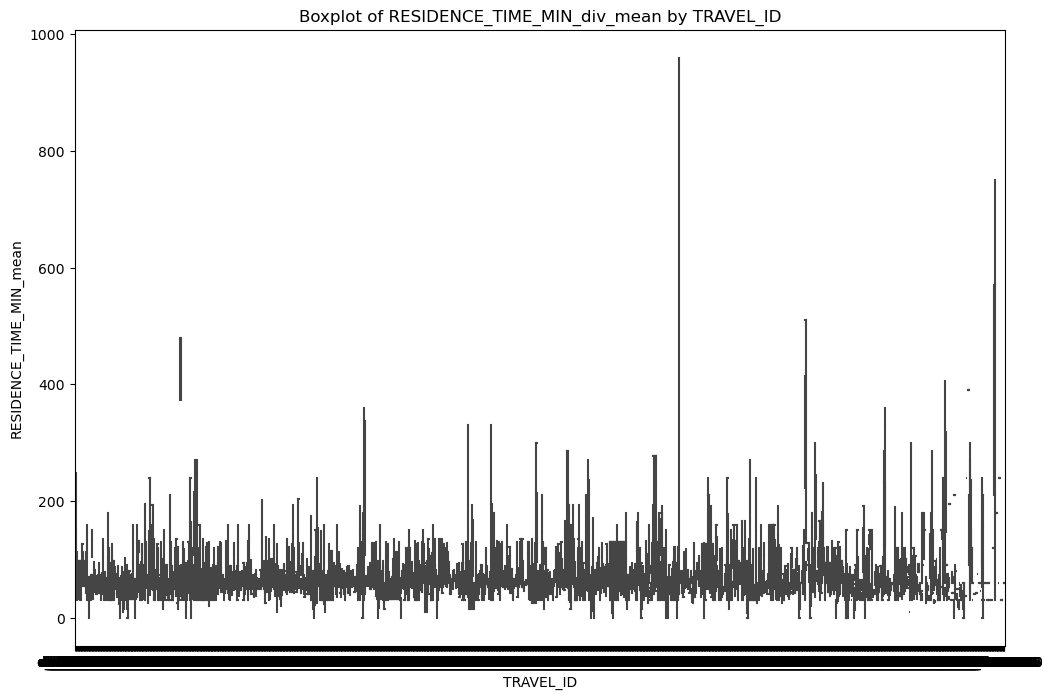

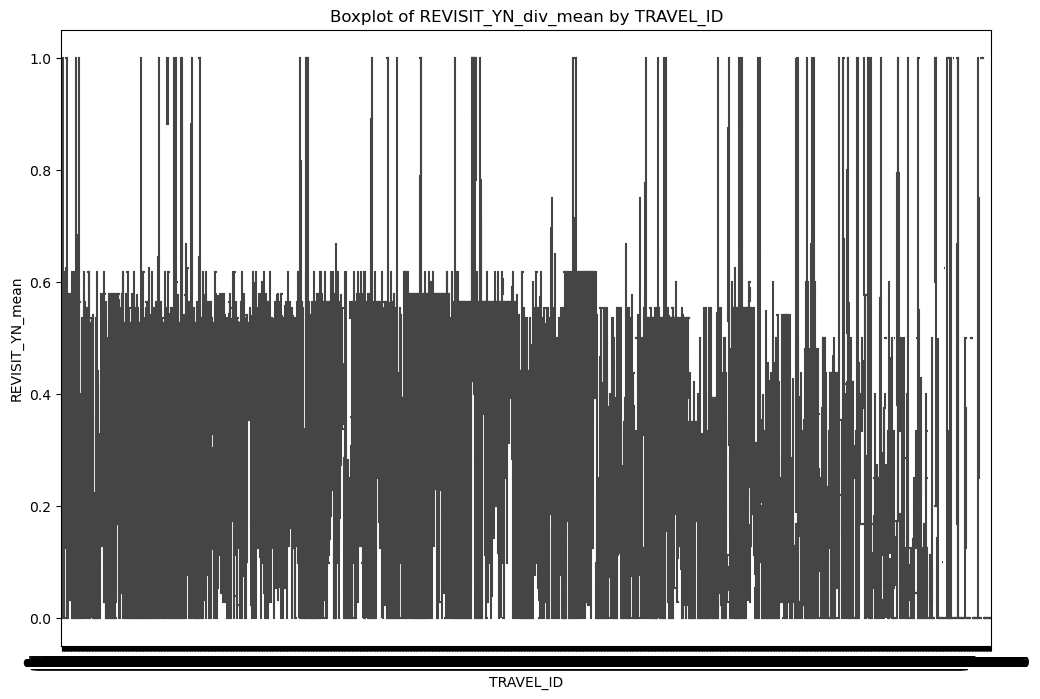

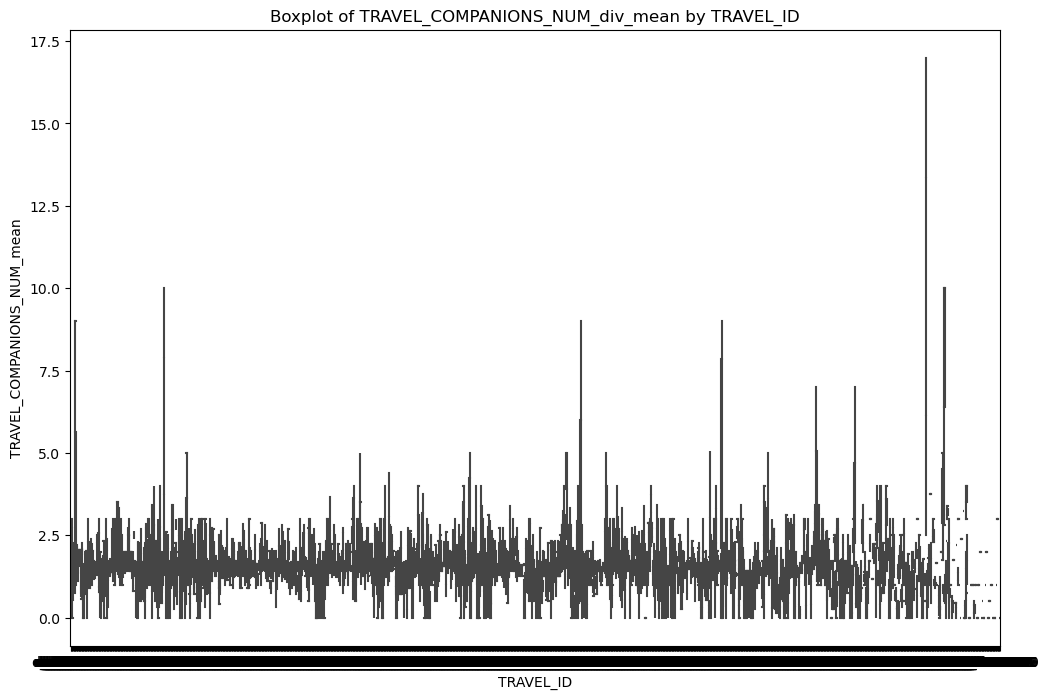

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

tmplst=['RESIDENCE_TIME_MIN', 'REVISIT_YN', 'TRAVEL_COMPANIONS_NUM']

for tmp in tmplst:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='TRAVEL_ID', y=f'{tmp}_mean', data=new_train, showfliers=False)
    plt.title(f'Boxplot of {tmp}_div_mean by TRAVEL_ID')
    plt.show()

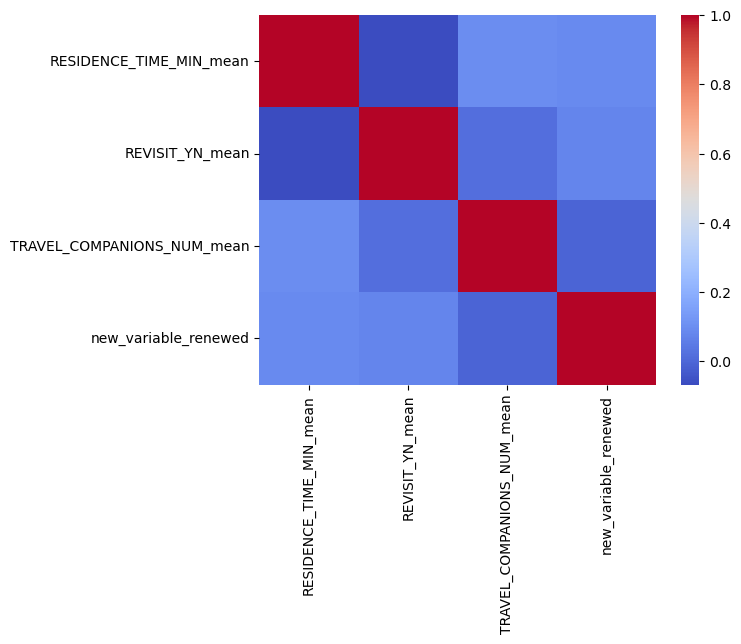

                            RESIDENCE_TIME_MIN_mean  REVISIT_YN_mean  \
RESIDENCE_TIME_MIN_mean                    1.000000        -0.067437   
REVISIT_YN_mean                           -0.067437         1.000000   
TRAVEL_COMPANIONS_NUM_mean                 0.097321         0.015963   
new_variable_renewed                       0.087950         0.074413   

                            TRAVEL_COMPANIONS_NUM_mean  new_variable_renewed  
RESIDENCE_TIME_MIN_mean                       0.097321              0.087950  
REVISIT_YN_mean                               0.015963              0.074413  
TRAVEL_COMPANIONS_NUM_mean                    1.000000             -0.007639  
new_variable_renewed                         -0.007639              1.000000  


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = new_train[['RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean', 'new_variable_renewed']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

print(correlation_matrix)

 'new_variable_renewed'와 강한 선형 관계를 갖지 않는다는 것을 확인할 수 있다. 따라서, 이러한 특성들이 서로 독립적으로 기여하는 것으로 보인다

In [61]:
new_train.sort_values(by = ['TRAVEL_ID'], axis = 0, inplace = True)

### Train, Test set 저장

In [62]:
new_train.to_csv('관광지 추천시스템 Trainset.csv', index = False)
df1.to_csv('관광지 추천시스템 Testset.csv', index = False)

## Train, Test set 불러오기

In [63]:
import pandas as pd
import numpy as np
Train = pd.read_csv('관광지 추천시스템 Trainset.csv')
test = pd.read_csv('관광지 추천시스템 Testset.csv')

In [64]:
print(Train.shape)
print(test.shape)

(5700, 34)
(1423, 31)


In [65]:
Train

,TRAVEL_ID,VISIT_AREA_NM,SI,Dong_Eup,VISIT_AREA_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,RESIDENCE_TIME_MIN,REVISIT_YN,...,TRAVEL_NUM,TRAVEL_COMPANIONS_NUM,DGSTFN_div_mean,REVISIT_INTENTION_div_mean,RCMDTN_INTENTION_div_mean,new_variable,new_variable_renewed,RESIDENCE_TIME_MIN_mean,REVISIT_YN_mean,TRAVEL_COMPANIONS_NUM_mean
0,a_a000317,이중섭미술관,서귀포,서귀동,3,5.0,5.0,5.0,60.0,0,...,3,3,1.136364,1.136364,1.136364,0.232766,0.188337,41.538462,0.307692,0.730769
1,a_a000317,돈내코계곡,서귀포,상효동,1,4.0,5.0,5.0,90.0,0,...,3,3,0.909091,1.136364,1.136364,0.132500,0.065944,60.000000,0.000000,1.500000
2,a_a000317,천제연폭포,서귀포,중문동,1,5.0,5.0,5.0,90.0,0,...,3,3,1.136364,1.136364,1.136364,0.232766,0.188337,67.241379,0.172414,1.482759
3,a_a000317,협재해수욕장,제주,한림읍,1,4.0,4.0,4.0,120.0,0,...,3,3,0.909091,0.909091,0.909091,-0.155177,-0.125558,66.617647,0.534314,1.475490
4,a_a000317,섭지코지,서귀포,성산읍,1,4.0,3.0,3.0,60.0,0,...,3,3,0.909091,0.681818,0.681818,-0.442854,-0.317060,61.000000,0.391667,1.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,d_d012472,여미지식물원,서귀포,색달동,6,3.0,3.0,3.0,60.0,1,...,1,4,0.800000,0.800000,0.800000,-0.341390,-0.276227,66.923077,0.307692,2.307692
5696,d_d012472,감귤박물관,서귀포,신효동,2,3.0,3.0,3.0,60.0,0,...,1,4,0.800000,0.800000,0.800000,-0.341390,-0.276227,54.375000,0.125000,1.500000
5697,d_d012472,서귀포매일올레시장,서귀포,서귀동,4,4.0,4.0,4.0,30.0,1,...,1,4,1.066667,1.066667,1.066667,0.113797,0.092076,53.963964,0.525526,1.639640
5698,d_d012472,관음사,제주,아라일동,2,5.0,5.0,5.0,60.0,1,...,1,4,1.333333,1.333333,1.333333,0.568983,0.460378,40.000000,0.222222,1.500000


## Train 4번 이상 방문한 곳으로만 필터링

In [66]:
len(Train['TRAVEL_ID'].unique())

1524

In [67]:
count = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())

In [68]:
print(list(count.groupby(['VISIT_AREA_NM'])['VISIT_AREA_NM']))

[(1, 모슬포교회 역사관     1
삼매봉공원         1
은희네해장국 본점     1
마농치킨 본점       1
제주맥주 양조장      1
             ..
코난해변          1
선덕사           1
서귀포항여객선터미널    1
보미다           1
제주소나이         1
Name: VISIT_AREA_NM, Length: 633, dtype: int64), (2, 야크마을               2
더마파크 더마카트          2
다이나믹메이즈 제주도성읍점     2
효명사                2
캐니언파크 제주점          2
                  ..
제주로컬 썸제주           2
포토이즘박스 서귀포올레시장점    2
낙천의자공원             2
봄사무소               2
이쁜선물가게             2
Name: VISIT_AREA_NM, Length: 148, dtype: int64), (3, 법화사                           3
제주동문수산시장                      3
새빌                            3
제주4.3평화공원 제주4.3평화기념관          3
스파오 제주중앙로점                    3
메리어트관 제주신화월드호텔앤리조트 모실클럽하우스    3
오늘은카트레이싱                      3
에이스서프                         3
팜파스 갈대정원                      3
걸매생태공원                        3
방림원                           3
제주드림타워                        3
한림수협마트                        3
주상절리대                         3
한림수협위판장                       3
제주

In [69]:
count

,VISIT_AREA_NM
서귀포매일올레시장,333
함덕해수욕장,250
협재해수욕장,204
제주동문시장,199
제주동문재래시장,141
...,...
코난해변,1
선덕사,1
서귀포항여객선터미널,1
보미다,1


In [70]:
count = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())
count['places'] = count.index
four_places = list(count[count['VISIT_AREA_NM']>=4]['places'])

for i in range(len(Train)):
    if Train['VISIT_AREA_NM'][i] not in four_places:
        Train = Train.drop([i], axis = 0)
Train.reset_index(drop = True, inplace = True)

In [71]:
count1 = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())
count_result = count1.groupby(['VISIT_AREA_NM']).size()
print(count_result)

VISIT_AREA_NM
4      39
5      25
6      14
7      13
8      18
9       9
10      6
11      9
12      5
13      4
14      4
15      2
16      3
17      1
18      3
19      4
20      3
21      1
22      1
23      1
24      1
25      3
26      4
27      3
28      3
29      2
30      1
31      1
32      2
38      1
42      1
43      2
47      1
48      1
50      2
53      1
57      1
58      1
61      1
63      1
64      1
68      1
70      1
78      1
82      1
86      1
87      1
120     1
127     1
128     1
141     1
199     1
204     1
250     1
333     1
dtype: int64


### 필터링으로 소실된 'TRAVEL_ID'비율

In [72]:
Train.shape

(4600, 34)

In [73]:
(len(Train['TRAVEL_ID'].unique()))/1524

0.931758530183727

In [74]:
len(Train['TRAVEL_ID'].unique())

1420

In [75]:
len(test['TRAVEL_ID'].unique())

679

In [76]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   4600 non-null   object 
 1   VISIT_AREA_NM               4600 non-null   object 
 2   SI                          4600 non-null   object 
 3   Dong_Eup                    4600 non-null   object 
 4   VISIT_AREA_TYPE_CD          4600 non-null   int64  
 5   DGSTFN                      4600 non-null   float64
 6   REVISIT_INTENTION           4600 non-null   float64
 7   RCMDTN_INTENTION            4600 non-null   float64
 8   RESIDENCE_TIME_MIN          4600 non-null   float64
 9   REVISIT_YN                  4600 non-null   int64  
 10  TRAVELER_ID                 4600 non-null   object 
 11  TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 12  GENDER                      4600 non-null   object 
 13  AGE_GRP                     4600 

## 초모수 조절

In [77]:
Train.columns

Index(['TRAVEL_ID', 'VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'DGSTFN', 'REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN',
       'REVISIT_YN', 'TRAVELER_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER',
       'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3',
       'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7',
       'TRAVEL_STYL_8', 'TRAVEL_MOTIVE_1', 'TRAVEL_NUM',
       'TRAVEL_COMPANIONS_NUM', 'DGSTFN_div_mean',
       'REVISIT_INTENTION_div_mean', 'RCMDTN_INTENTION_div_mean',
       'new_variable', 'new_variable_renewed', 'RESIDENCE_TIME_MIN_mean',
       'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean'],
      dtype='object')

In [78]:
Train.drop(['TRAVELER_ID', 'REVISIT_INTENTION',
            'RCMDTN_INTENTION','DGSTFN','DGSTFN_div_mean','RESIDENCE_TIME_MIN', 'REVISIT_YN',
           'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean','new_variable'], axis = 1, inplace = True)
test.drop(['TRAVELER_ID', 'REVISIT_INTENTION',
            'RCMDTN_INTENTION','DGSTFN','DGSTFN_div_mean','RESIDENCE_TIME_MIN', 'REVISIT_YN',
           'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean','new_variable'], axis = 1, inplace = True)

In [79]:
len(Train.columns)

24

In [80]:
len(test.columns)

21

In [81]:
Train['VISIT_AREA_TYPE_CD'] = Train['VISIT_AREA_TYPE_CD'].astype('string')
test['VISIT_AREA_TYPE_CD'] = test['VISIT_AREA_TYPE_CD'].astype('string')
Train['TRAVEL_MOTIVE_1'] = Train['TRAVEL_MOTIVE_1'].astype('int64')
test['TRAVEL_MOTIVE_1'] = test['TRAVEL_MOTIVE_1'].astype('int64')
y_train = Train['new_variable_renewed']
X_train = Train.drop(['new_variable_renewed'], axis = 1)

In [82]:
!pip install scikit-learn
!pip install tqdm
!pip install catboost

In [83]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import joblib
import time
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [84]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   4600 non-null   object 
 1   VISIT_AREA_NM               4600 non-null   object 
 2   SI                          4600 non-null   object 
 3   Dong_Eup                    4600 non-null   object 
 4   VISIT_AREA_TYPE_CD          4600 non-null   string 
 5   TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 6   GENDER                      4600 non-null   object 
 7   AGE_GRP                     4600 non-null   int64  
 8   INCOME                      4600 non-null   int64  
 9   TRAVEL_STYL_1               4600 non-null   int64  
 10  TRAVEL_STYL_2               4600 non-null   int64  
 11  TRAVEL_STYL_3               4600 non-null   int64  
 12  TRAVEL_STYL_4               4600 non-null   int64  
 13  TRAVEL_STYL_5               4600 

In [85]:
def cross_validation(X_train, y_train, cv, iteration, number, random_state): #X_train 데이터, y_train 데이터, cv 개수, random search 횟수, random_state

    X_train1 = X_train #변수 옮기기
    y_train1 = y_train #변수 옮기기
    for i in range(cv): #각 fold마다의 X_train, y_train 생성 (Train_1, Train_2, ... / target_1, target_2, ...)
        globals()['Train_'+str(i+1)] = pd.DataFrame(columns = list(X_train.columns))
        globals()['target_'+str(i+1)] = []
    print(str(cv)+'개의 fold를 생성중입니다.....')
    for i in tqdm(range(cv)):
        np.random.seed(random_state) #초기 시드 설정
        while (len(globals()['Train_'+str(i+1)]) / len(X_train)) < (1/cv): #1/cv 비율 만큼의 데이터가 모일 때까지
            random_number = np.random.randint(len(X_train1))
            df_id = X_train1.iloc[[random_number]]
            index = df_id.iloc[0,0] #랜덤하게 유저를 선택하고
            df1 = X_train1[X_train1['TRAVEL_ID'] == index] #그 유저가 갔던 모든 여행지 불러오고
            target_index = X_train1[X_train1['TRAVEL_ID'] == index].index
            X_train1 = pd.merge(df1, X_train1, how = 'outer', indicator = True)
            X_train1 = X_train1.query('_merge =="right_only"').drop(columns = ['_merge']) #기존 데이터프레임은 해당 유저 정보 삭제
            globals()['Train_'+str(i+1)] = globals()['Train_'+str(i+1)].append(df1) #validation set에 유저의 X_train 삽입
            globals()['target_'+str(i+1)].extend(list(y_train[list(target_index)])) #유저의 X_train에 상응하는 y_train 삽입
            if len(X_train1) == 0: #기존 데이터프레임에 모든 유저정보가 사라지면 validation set 생성이 완료된 것이므로 정지
                break
    print(str(cv)+'개의 fold 생성이 완료되었습니다!')
    print('함수에서 설정한 초모수 범위 내에서 ' + str(cv)+'개의 validation 검정을 진행합니다...' )
    
    
    np.random.seed(random_state)
    initial = 0 
    for a in tqdm(range(iteration)):
        print(str(a+1) + "번째 초모수 조절치에 대한 학습을 진행합니다....")
        n_estimators = np.random.choice(np.arange(1580, 1611, 10))

        print(n_estimators)

        final_recall = [] # K개의 검증 성능이 들어갈 리스트

        for j in range(cv): #K개 fold중
            print(str(a+1) + '번째 초모수 조절치의' + str(j+1)+'번째 fold를 학습하고 있습니다....')
            #한 fold에 대해서 학습
            combine_df_list = list(range(1, (cv+1))) # 1부터 cv까지 숫자리스트 만들어서
            del combine_df_list[j] #숫자 하나를 지우고, 그 숫자가 있는 Train set을 Validation set으로 설정
            #예를 들어 1이 빠졌으면 Train_1이 validation set, Train_2, Train_3, ... 는 Train set
            X_new_train = pd.DataFrame(columns = list(globals()['Train_'+str(j+1)].columns))
            y_new_train = []
            for i in combine_df_list: #지운 숫자 외의 숫자가 있는 Train set들을 결합
                X_new_train = pd.concat([X_new_train, globals()['Train_'+str(i)]], axis = 0) #X_train 결합
                y_new_train.extend(globals()['target_'+str(i)]) #y_train 결합
            y_new_train = np.array(y_new_train).astype(np.float64)
            X_new_train.drop(['TRAVEL_ID'], axis = 1, inplace = True) #필요 없는 컬럼 제거
            if 'new_feature' in list(X_new_train.columns): #global 함수에서 발생하는 오류 해결
                X_new_train.drop(['new_feature'], axis = 1, inplace = True)
            model = CatBoostRegressor(n_estimators = n_estimators,
                                  cat_features = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                                              'TRAVEL_MISSION_PRIORITY', 'AGE_GRP', 'GENDER','TRAVEL_MOTIVE_1'], 
                                  random_state = 42)
        ##############################################################################################

            model.fit(X_new_train, y_new_train) #########모델 적합

            #학습한 fold에 대한 test 값 도출
            recall_10_list = [] #validation set의 recall 측정값들이 들어갈 리스트
            #####################유저 정보##################################
            data = globals()['Train_'+str(j+1)][['TRAVEL_ID', 'SI', 'Dong_Eup', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
            data1 = pd.DataFrame(columns=['TRAVEL_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'sido_gungu_list'])
            for i in list(data['TRAVEL_ID'].unique()):
                temp_df = data[data['TRAVEL_ID'] == i]
                temp_df1 = temp_df[['SI', 'Dong_Eup']] #각 유저별 방문한 시군구 확인
                temp_df1.reset_index(drop = True, inplace = True)
                sido_gungu_visit = []
                for k in range(len(temp_df1)):
                    sido_gungu_visit.append(temp_df1['SI'][k] + '+' + temp_df1['Dong_Eup'][k])
                sido_gungu_list = list(set(sido_gungu_visit))
                new = temp_df.drop(['SI', 'Dong_Eup'], axis = 1) #기존 시도, 군구 제외하고
                new = new.head(1)
                new['sido_gungu_list'] = str(sido_gungu_list)
                data1 = pd.concat([data1, new], axis = 0) #새로운 데이터프레임 생성 
            data1.reset_index(drop = True, inplace = True)
            ##########################여행지 정보################################
            info = X_new_train[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD','RESIDENCE_TIME_MIN_mean',
            'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean']]
            info.drop_duplicates(['VISIT_AREA_NM'], inplace = True)
            ###### number회 이상 관광한 방문지 리스트 생성
            visiting_list = X_new_train[['VISIT_AREA_NM']] #train set에 있는 방문지에 대해서만 number회 이상 방문하였는지 확인
            visiting_list.reset_index(drop = True, inplace = True)
            #데이터 전처리
            dfdf = pd.DataFrame(visiting_list.value_counts(), columns = ['count'])
            dfdf['VISIT_AREA_NM'] = dfdf.index
            dfdf.reset_index(drop = True, inplace = True)
            for i in range(len(dfdf)):
                dfdf['VISIT_AREA_NM'][i] = str(dfdf['VISIT_AREA_NM'][i])
                dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i].replace("(","").replace(")","").replace(",","").replace("\''","")
                dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i][1:-1]
            #n회 이상 적용
            dfdf = dfdf[dfdf['count'] >= number] 
            visit_list = list(dfdf['VISIT_AREA_NM']) #visit_list에 number회 이상 방문지 리스트
            #방문지가 number회 이상 방문한 관광지 아니면 제거
            info.reset_index(drop = True, inplace = True)
            for i in range(len(info)):
                if info['VISIT_AREA_NM'][i] not in visit_list:
                    info = info.drop([i], axis = 0)
            info.reset_index(drop = True, inplace = True)
            ##########################모델 10개 관광지 추천############################
            result = []
            for i in range(len(data1)):
                #데이터

                final_df = pd.DataFrame(columns = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                       'TRAVEL_COMPANIONS_NUM_mean']) #빈 데이터프레임에 내용 추가
                ####### 시/도 군/구 별 자료 수집
                temp = data1['sido_gungu_list'][i].replace("[","").replace("]","").replace("\'","").replace(", ",",")
                places_list = list(map(str, temp.split(",")))
                for q in places_list:
                    si, dong_eup = map(str, q.split("+"))

                    info_df = info[(info['SI'] == si) & (info['Dong_Eup'] == dong_eup)] 

                    info_df.drop(['SI'], inplace = True, axis = 1)
                    info_df.reset_index(inplace = True, drop = True)
                    data2 = data1.drop(['sido_gungu_list'], axis =1)
                    user_df = pd.DataFrame([data2.iloc[i].to_list()]*len(info_df), columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                        'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                        'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                        'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM'])
                    df = pd.concat([user_df, info_df], axis = 1)
                    df = df[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                   'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                   'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                   'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                   'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                   'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                   'TRAVEL_COMPANIONS_NUM_mean']] # 변수정렬
                    df['VISIT_AREA_TYPE_CD'] = df['VISIT_AREA_TYPE_CD'].astype('string')
                    final_df = pd.concat([final_df, df], axis = 0)
                final_df.reset_index(drop = True, inplace = True)
                final_df.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

                #모델 예측
                y_pred = model.predict(final_df)
                y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
                test_df1 = pd.concat([final_df, y_pred], axis = 1)
                test_df1.sort_values(by = ['y_pred'], axis = 0, ascending=False, inplace = True) # 예측치가 높은 순대로 정렬

                test_df1 = test_df1.iloc[0:10,] #상위 10개 관광지 추천

                visiting_candidates = list(test_df1['VISIT_AREA_NM']) # 모델이 추천한 관광지들을 리스트 형태로 변환

               # 유저정보와 추천 관광지
                test_df2 = test_df1[['SI','TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
                if len(test_df2) == 0:
                    rec = []
                    result.append(rec)
                else:

                    rec = test_df2.iloc[0].to_list()

                    rec.append(visiting_candidates)

                    result.append(rec)
            final_df = pd.DataFrame(result,
                                columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'recommend_result_place'])
            final_df = final_df[['recommend_result_place']]
            travel_id = data1[['TRAVEL_ID']]
            travel_id.reset_index(drop = True, inplace = True)
            final_df = pd.concat([travel_id, final_df], axis = 1)

            #추천지 10개 미만인 여행 ID확인
            travel_id_list = []
            for i in range(len(final_df)):
                recommend_list = final_df['recommend_result_place'][i]
                if str(recommend_list).count(',') < 9:
                    travel_id_list.append(final_df['TRAVEL_ID'][i])
                if pd.isna(str(recommend_list)):
                    travel_id_list.append(final_df['TRAVEL_ID'][i])
            ## 군구 리스트
            places = list(set(globals()['Train_'+str(j+1)]['Dong_Eup']))
            for i in range(len(places)):
                if places[i][-1] == '동' or places[i][-1] == '읍' or places[i][-1] == '면':
                    places[i] = places[i][:-1]

            ###############################################################
            ######## 최종 성능 평가 #########################################
            #########################################################
            visit_list = list(info['VISIT_AREA_NM'])
            globals()['Train_'+str(j+1)]['new_feature'] = globals()['target_'+str(j+1)]



            for i in list(globals()['Train_'+str(j+1)]['TRAVEL_ID'].unique()):

                #추천한 방문지가 10개 미만이면 0
                if i in travel_id_list:
                    recall_10_list.append(0)
                    continue

                satisfied = globals()['Train_'+str(j+1)][globals()['Train_'+str(j+1)]['TRAVEL_ID'] == i] #실제(y_actual) 관광객이 만족한 관광지
                satisfied.reset_index(drop = True, inplace = True) 


                satisfied1 = satisfied[satisfied['new_feature'] >=0 ] #만족의 기준은 new_feature가 0이상 일때만 만족이라고 정의
                if len(satisfied1) == 0: # 유저가 만족한 관광지가 하나도 없으면 recall@10은 어차피 0
                    recall_10_list.append(0)
                    continue
                else:
                    item_list = satisfied1['VISIT_AREA_NM']


                item_list = list(set(item_list))


            #final_df의 추천지 10개랑 비교

                recommend_list = final_df[final_df['TRAVEL_ID'] == i]['recommend_result_place'] #모델 추천 관광지 10개

                summ = 0
                for n in item_list:
                    word_list = list(n.split(' '))
                    if word_list[-1][-1] == '점': #지점명 삭제
                        del word_list[-1]
                    for o in word_list:
                        if o in places:#장소에 군/구 명 있으면 아무것도 하지 않고 스킵
                            pass
                        else:
                            for p in recommend_list: #장소에 교차어 있으면 해당 장소는 방문했다고 인식하기
                                if o in str(p) :
                                    summ += 1
                recall10_for_1user = summ / min(10, len(satisfied1)) #recall@10 산식
                if recall10_for_1user > 1:
                    recall10_for_1user = 1
                recall_10_list.append(recall10_for_1user)
            globals()['Train_'+str(j+1)].drop(['new_feature'], axis = 1, inplace = True) #globals 함수 오류 해결하기 위한 코드
            
            recall_for_one_cv = sum(recall_10_list) / len(recall_10_list) #한 fold에 대한 recall@10값 추출
                
            final_recall.append(recall_for_one_cv)

        recallat10 = sum(final_recall) / len(final_recall)
        print('이번 결과는:', recallat10)
        ###################### hyperparameter 바꾸면 여기도 수정해야 ######################
        ###################################################################################
        print('이번 결과의 parameter은: ', 'n_estimators:', n_estimators)
        if recallat10 > initial:
            initial = recallat10
            print('신기록!:', initial)
            print('n_estimators:', n_estimators)
            final_estimator = n_estimators

         #####################################################################################
    print('최종 parameter은 :',  final_estimator)
    return(initial)

In [86]:
cross_validation(X_train, y_train, cv = 10, iteration = 2, number = 4, random_state = 42)

10개의 fold를 생성중입니다.....


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.53s/it]


10개의 fold 생성이 완료되었습니다!
함수에서 설정한 초모수 범위 내에서 10개의 validation 검정을 진행합니다...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

1번째 초모수 조절치에 대한 학습을 진행합니다....
1600
1번째 초모수 조절치의1번째 fold를 학습하고 있습니다....
Learning rate set to 0.034972
0:	learn: 0.2504004	total: 143ms	remaining: 3m 49s
1:	learn: 0.2503932	total: 153ms	remaining: 2m 2s
2:	learn: 0.2503634	total: 170ms	remaining: 1m 30s
3:	learn: 0.2503206	total: 187ms	remaining: 1m 14s
4:	learn: 0.2502530	total: 204ms	remaining: 1m 5s
5:	learn: 0.2501997	total: 219ms	remaining: 58.2s
6:	learn: 0.2501925	total: 227ms	remaining: 51.6s
7:	learn: 0.2501483	total: 241ms	remaining: 47.9s
8:	learn: 0.2501131	total: 256ms	remaining: 45.2s
9:	learn: 0.2500322	total: 271ms	remaining: 43s
10:	learn: 0.2499924	total: 286ms	remaining: 41.2s
11:	learn: 0.2499568	total: 300ms	remaining: 39.7s
12:	learn: 0.2498652	total: 314ms	remaining: 38.4s
13:	learn: 0.2498049	total: 329ms	remaining: 37.2s
14:	learn: 0.2497121	total: 343ms	remaining: 36.3s
15:	learn: 0.2495784	total: 358ms	remaining: 35.5s
16:	learn: 0.2495457	total: 374ms	remaining: 34.9s
17:	learn: 0.2495341	total: 391ms	remaini

 50%|█████████████████████████████████████████▌                                         | 1/2 [05:04<05:04, 304.94s/it]

이번 결과는: 0.3374591813316058
이번 결과의 parameter은:  n_estimators: 1600
신기록!: 0.3374591813316058
n_estimators: 1600
2번째 초모수 조절치에 대한 학습을 진행합니다....
1610
2번째 초모수 조절치의1번째 fold를 학습하고 있습니다....
Learning rate set to 0.034795
0:	learn: 0.2504005	total: 7.04ms	remaining: 11.3s
1:	learn: 0.2503934	total: 12.4ms	remaining: 9.97s
2:	learn: 0.2503637	total: 27.7ms	remaining: 14.9s
3:	learn: 0.2503211	total: 45.4ms	remaining: 18.2s
4:	learn: 0.2502538	total: 62.9ms	remaining: 20.2s
5:	learn: 0.2502008	total: 80.5ms	remaining: 21.5s
6:	learn: 0.2501936	total: 88.6ms	remaining: 20.3s
7:	learn: 0.2501497	total: 104ms	remaining: 20.9s
8:	learn: 0.2501146	total: 120ms	remaining: 21.4s
9:	learn: 0.2500341	total: 136ms	remaining: 21.8s
10:	learn: 0.2499945	total: 153ms	remaining: 22.2s
11:	learn: 0.2499591	total: 169ms	remaining: 22.5s
12:	learn: 0.2498679	total: 184ms	remaining: 22.7s
13:	learn: 0.2498079	total: 200ms	remaining: 22.7s
14:	learn: 0.2497156	total: 215ms	remaining: 22.9s
15:	learn: 0.2495825	total:

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [10:10<00:00, 305.12s/it]

이번 결과는: 0.3397665969932183
이번 결과의 parameter은:  n_estimators: 1610
신기록!: 0.3397665969932183
n_estimators: 1610
최종 parameter은 : 1610


0.3397665969932183

최선의 n_estimator는 1610이다

### n_estimator = 1610을 사용하여 catboost모델을 만듦

In [87]:
y_train = Train['new_variable_renewed']
X_train = Train.drop(['new_variable_renewed', 'TRAVEL_ID'], axis = 1)

In [88]:
model = CatBoostRegressor(n_estimators = 1610,
                          cat_features = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                                              'TRAVEL_MISSION_PRIORITY', 'AGE_GRP', 'GENDER','TRAVEL_MOTIVE_1'])
model.fit(X_train, y_train)

Learning rate set to 0.035379
0:	learn: 0.2399273	total: 16.6ms	remaining: 26.7s
1:	learn: 0.2397247	total: 34.5ms	remaining: 27.7s
2:	learn: 0.2394901	total: 53.6ms	remaining: 28.7s
3:	learn: 0.2392264	total: 69.5ms	remaining: 27.9s
4:	learn: 0.2390069	total: 84.5ms	remaining: 27.1s
5:	learn: 0.2388078	total: 98.5ms	remaining: 26.3s
6:	learn: 0.2386608	total: 114ms	remaining: 26s
7:	learn: 0.2384153	total: 128ms	remaining: 25.6s
8:	learn: 0.2382273	total: 142ms	remaining: 25.3s
9:	learn: 0.2379969	total: 157ms	remaining: 25.2s
10:	learn: 0.2377521	total: 172ms	remaining: 25.1s
11:	learn: 0.2377081	total: 179ms	remaining: 23.9s
12:	learn: 0.2375947	total: 193ms	remaining: 23.7s
13:	learn: 0.2373950	total: 211ms	remaining: 24s
14:	learn: 0.2372134	total: 228ms	remaining: 24.2s
15:	learn: 0.2370794	total: 244ms	remaining: 24.3s
16:	learn: 0.2369507	total: 259ms	remaining: 24.2s
17:	learn: 0.2367898	total: 274ms	remaining: 24.2s
18:	learn: 0.2366325	total: 289ms	remaining: 24.2s
19:	learn

In [89]:
now = time
print(now.strftime('%Y-%m-%d %H:%M:%S'))

2024-02-01 16:17:03


In [90]:
joblib.dump(model,'catboost_model.pkl')

['catboost_model.pkl']

In [91]:
modeld = joblib.load('catboost_model.pkl')
traind = pd.read_csv('관광지 추천시스템 Trainset.csv')
testd = pd.read_csv('관광지 추천시스템 Testset.csv')

In [92]:
print(len(Train['TRAVEL_ID'].unique()))
print(len(test['TRAVEL_ID'].unique()))

1420
679


## Test 사용해 model 테스트

### test 'sido_gungu_list'추가

In [93]:
data = testd[['TRAVEL_ID', 'SI','Dong_Eup', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]

In [94]:
data1 = pd.DataFrame(columns=['TRAVEL_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'sido_gungu_list'])
for i in tqdm(list(data['TRAVEL_ID'].unique())):
    temp_df = data[data['TRAVEL_ID'] == i]
    temp_df1 = temp_df[['SI','Dong_Eup']] #각 유저별 방문한 시군구 확인
    temp_df1.reset_index(drop = True, inplace = True)
    sido_gungu_visit = []
    for j in range(len(temp_df1)):
        sido_gungu_visit.append(temp_df1['SI'][j] + '+' + temp_df1['Dong_Eup'][j])
    sido_gungu_list = list(set(sido_gungu_visit))
    new = temp_df.drop(['SI','Dong_Eup'], axis = 1) #기존 시도, 군구 제외하고
    new = new.head(1)
    new['sido_gungu_list'] = str(sido_gungu_list)
    data1 = pd.concat([data1, new], axis = 0) #새로운 데이터프레임 생성     

100%|███████████████████████████████████████████████████████████████████████████████| 679/679 [00:01<00:00, 478.60it/s]


In [95]:
#유저 정보 저장
data1.reset_index(drop = True, inplace = True)
data1.to_csv('관광지 추천시스템 Testset- 유저 정보.csv', index=False)

In [96]:
#여행지 정보
info = traind[['VISIT_AREA_NM','SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD','RESIDENCE_TIME_MIN_mean','REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean']]
info.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

### 4회 이상 방문한 test set에 있는 방문지

In [97]:
visiting_list = testd[['VISIT_AREA_NM']] 
visiting_list.reset_index(drop = True, inplace = True)

dfdf = pd.DataFrame(visiting_list.value_counts(), columns = ['count'])
dfdf['VISIT_AREA_NM'] = dfdf.index
dfdf.reset_index(drop = True, inplace = True)
for i in range(len(dfdf)):
    dfdf['VISIT_AREA_NM'][i] = str(dfdf['VISIT_AREA_NM'][i])
    dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i].replace("(","").replace(")","").replace(",","").replace("\''","")
    dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i][1:-1]

dfdf = dfdf[dfdf['count'] >= 4]
visit_list = list(dfdf['VISIT_AREA_NM'])

In [98]:
info.reset_index(drop = True, inplace = True)
for i in tqdm(range(len(info))):
    if info['VISIT_AREA_NM'][i] not in visit_list:
        info = info.drop([i], axis = 0)
info.reset_index(drop = True, inplace = True)

100%|████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:00<00:00, 3539.71it/s]


In [99]:
info.reset_index(drop = True, inplace = True)
info.to_csv( '관광지 추천시스템 Testset- 여행지 정보.csv', index=False)

In [100]:
print(len(info['VISIT_AREA_NM'].unique()))
print(len(Train['VISIT_AREA_NM'].unique()))

79
213


In [101]:
data = pd.read_csv('관광지 추천시스템 Testset- 유저 정보.csv')
info = pd.read_csv('관광지 추천시스템 Testset- 여행지 정보.csv')

## Test set으로 성능 확인

In [102]:
result = []
for i in tqdm(range(len(data1))):

    final_df = pd.DataFrame(columns = ['VISIT_AREA_NM', 'SI','Dong_Eup', 'VISIT_AREA_TYPE_CD',
           'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
           'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
           'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
           'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
           'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
           'TRAVEL_COMPANIONS_NUM_mean'])
    ####### 시/도 군/구 별 자료 수집
    temp = data['sido_gungu_list'][i].replace("[","").replace("]","").replace("\'","").replace(", ",",")
    places_list = list(map(str, temp.split(",")))
    for q in places_list:
        si,dong_eup = map(str, q.split("+"))

        info_df = info[(info['SI'] == si) & (info['Dong_Eup'] == dong_eup)]

        info_df.drop(['SI'], inplace = True, axis = 1)
        info_df.reset_index(inplace = True, drop = True)
        data2 = data1.drop(['sido_gungu_list'], axis =1)
        user_df = pd.DataFrame([data2.iloc[i].to_list()]*len(info_df), columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM'])
        #print(user_df)
        #print(info_df)
        df = pd.concat([user_df, info_df], axis = 1)
        df = df[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
       'TRAVEL_COMPANIONS_NUM_mean']] # 변수정렬
        df['VISIT_AREA_TYPE_CD'] = df['VISIT_AREA_TYPE_CD'].astype('string')
        df['TRAVEL_MOTIVE_1'] = df['TRAVEL_MOTIVE_1'].astype('int64')
        final_df = pd.concat([final_df, df], axis = 0)
    final_df.reset_index(drop = True, inplace = True)
    final_df.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

    #모델 예측
    y_pred = modeld.predict(final_df)
    y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
    test_df1 = pd.concat([final_df, y_pred], axis = 1)
    test_df1.sort_values(by = ['y_pred'], axis = 0, ascending=False, inplace = True) # 예측치가 높은 순대로 정렬

    test_df1 = test_df1.iloc[0:10,] #상위 10개 관광지 추천

    visiting_candidates = list(test_df1['VISIT_AREA_NM']) # 모델이 추천한 관광지들을 리스트 형태로 변환

# 유저정보와 추천 관광지
    test_df2 = test_df1[['SI','TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                        'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                        'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                        'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
    if len(test_df2) == 0:
        rec = []
        result.append(rec)
    else:
        
        rec = test_df2.iloc[0].to_list()

        rec.append(visiting_candidates)

        result.append(rec)


100%|████████████████████████████████████████████████████████████████████████████████| 679/679 [00:09<00:00, 71.62it/s]


In [103]:
final_df = pd.DataFrame(result,
                            columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'recommend_result_place'])
final_df = final_df[['recommend_result_place']]
travel_id = data1[['TRAVEL_ID']]
travel_id.reset_index(drop = True, inplace = True)
final_df = pd.concat([travel_id, final_df], axis = 1)

In [104]:
#output_df 저장
final_df.to_csv('관광지 추천시스템 Testset- OUTPUT.csv', index=False)
#output_df 불러오기
final_df = pd.read_csv('관광지 추천시스템 Testset- OUTPUT.csv')

In [105]:
final_df

,TRAVEL_ID,recommend_result_place
0,b_b000465,"['스누피가든', '세화해변', '김녕해수욕장', '비자림', '만장굴', '이마트..."
1,c_c009086,NaN
2,d_d004269,"['서귀포매일올레시장', '올레야시장', '이중섭미술관', '이중섭거리', '상효원..."
3,d_d005392,['용두암']
4,d_d010391,"['휴애리자연생활공원', '남원큰엉해변']"
...,...,...
674,d_d003833,"['9.81파크', '아르떼뮤지엄 제주', '소길별하', '항파두리 항몽유적지', ..."
675,d_d004399,NaN
676,d_d003574,"['올레야시장', '이중섭미술관', '서귀포매일올레시장', '이중섭거리']"
677,d_d004241,['노형수퍼마켙']


### 성능을 올리기 위한 방법

- 아무래도 사람이 수기로 데이터를 입력하다 보니까 유사/동일 장소를 갔음에도 컴퓨터는 다른 장소로 인식 
    -ex1: ’파라다이스시티‘와 ’파라다이스시티 주차장‘을 다른 장소로 인식
    -ex2: ‘국립중앙박물관 특별전시관’과 ‘국립중앙박물관’을 다른 장소로 인식
- 그러므로 ‘모델이 추천한 추천지 10개’와 ‘유저가 만족한다고 했던 곳’을 단어 별로 쪼개서 공통어가 있으면 교집합 개수에 추가
    -ex1: ‘파라다이스시티’와 ‘파라다이스시티 주차장’은 ‘파라다이스시티’라는 공통어가 있으므로 교집합 개수에 추가
    -ex2: ‘국립중앙박물관 특별전시관’과 ‘국립중앙박물관’은 ‘국립중앙박물관’이라는 공통어가 있으므로 교집합 개수에 추가
- ‘파주점’, ‘하남점’ 등 지점명이 공통어가 되는 경우 배제
    -ex1: ‘롯데프리미엄아울렛 파주점'이라는 장소가 있을 때, 마지막 단어의 마지막 글자가 '점'일 경우에 마지막 글자를 제거 (공통어 비교 시 '롯데프리미엄아울렛'만 비교)
- 유저가 방문한 장소에 군/구가 공통어가 되는 경우 배제
    -ex1: 유저가 방문한 '스타필드 고양'은 ’스타필드‘, ’고양‘으로 나누어지는데, '고양'이라는 군/구 명을 제거해서 ’고양 어울림누리‘ 같은 장소와 교차어로 포함되지 않도록 함

In [106]:
y_testd = testd['new_variable_renewed']
X_testd = testd.drop(['new_variable_renewed'], axis = 1)

In [107]:
places = list(set(X_testd['Dong_Eup']))
for i in range(len(places)):
    if places[i][-1] == '동' or places[i][-1] == '면' or places[i][-1] == '읍':
        places[i] = places[i][:-1]

### 추천치 10개 미만인 여행 ID처리

In [108]:
travel_id_list = []
for i in tqdm(range(len(final_df))):
    recommend_list = final_df['recommend_result_place'][i]
    if pd.isna(recommend_list):
        travel_id_list.append(final_df['TRAVEL_ID'][i])
        continue
    if recommend_list.count(',') < 9:
        travel_id_list.append(final_df['TRAVEL_ID'][i])

100%|█████████████████████████████████████████████████████████████████████████████| 679/679 [00:00<00:00, 77938.00it/s]


### 성능확인
여행자가 관광지에 만족했다는 기준을 new_variable_renewed >= -0.1이라고 정함 (전체의 73%정도)
여행자가 다녀온 관광지 중에서 new_variable_renewed이 -0.1이상인 관광지 목록

In [109]:
recall_10_list = []
visit_list = list(info['VISIT_AREA_NM'])
for i in tqdm(list(testd['TRAVEL_ID'].unique())):
    
    #추천한 방문지가 10개 미만이면 0
    if i in travel_id_list:
        recall_10_list.append(0)
        continue
    
    satisfied = testd[testd['TRAVEL_ID'] == i] #실제(y_actual) 관광객이 만족한 관광지
    satisfied.reset_index(drop = True, inplace = True) 
    satisfied1 = satisfied[satisfied['new_variable_renewed'] >=-0.1 ] #만족의 기준은 0이상 일때만 만족이라고 정의
    if len(satisfied1) == 0: # 유저가 만족한 관광지가 하나도 없으면 recall@10은 어차피 0
        recall_10_list.append(0)
        continue
    else:
        item_list = satisfied1['VISIT_AREA_NM']
                
                
    item_list = list(set(item_list))
    
#final_df의 추천지 10개랑 비교
    recommend_list = final_df[final_df['TRAVEL_ID'] == i]['recommend_result_place'] #모델 추천 관광지 10개
    print(recommend_list)
    summ = 0
    for n in item_list:
        word_list = list(n.split(' '))
        if word_list[-1][-1] == '점': #지점명 삭제
            del word_list[-1]
        for o in word_list:
            if o in places:#장소에 군/구 명 있으면 아무것도 하지 않고 스킵
                pass
            else:
                for p in recommend_list: #장소에 교차어 있으면 해당 장소는 방문했다고 인식하기
                    if o in str(p) :
                        summ += 1
    recall10_for_1user = summ / min(10, len(satisfied1)) #recall@10 산식
    if recall10_for_1user > 1:
        recall10_for_1user = 1
    recall_10_list.append(recall10_for_1user)

 65%|██████████████████████████████████████████████████▎                           | 438/679 [00:00<00:00, 2155.71it/s]

7    ['한라산아래첫마을', '포도뮤지엄', '9.81파크', '산방산탄산온천', '본태...
Name: recommend_result_place, dtype: object
10    ['아쿠아플라넷 제주', '함덕해수욕장', '성산일출봉', '남원큰엉해변', '섭지...
Name: recommend_result_place, dtype: object
13    ['스누피가든', '세화해변', '김녕해수욕장', '비자림', '9.81파크', '...
Name: recommend_result_place, dtype: object
15    ['협재해수욕장', '금능해수욕장', '9.81파크', '한림공원', '아르떼뮤지엄...
Name: recommend_result_place, dtype: object
16    ['아쿠아플라넷 제주', '스누피가든', '성산일출봉', '비자림', '세화해변',...
Name: recommend_result_place, dtype: object
18    ['한라산아래첫마을', '포도뮤지엄', '본태박물관', '산방산탄산온천', '제주항...
Name: recommend_result_place, dtype: object
19    ['천제연폭포', '서귀포매일올레시장', '올레야시장', '남원큰엉해변', '이중섭...
Name: recommend_result_place, dtype: object
26    ['포도뮤지엄', '한라산아래첫마을', '산방산탄산온천', '본태박물관', '카멜리...
Name: recommend_result_place, dtype: object
28    ['한라산아래첫마을', '포도뮤지엄', '본태박물관', '휴애리자연생활공원', '카...
Name: recommend_result_place, dtype: object
31    ['수목원테마파크', '9.81파크', '제주목 관아', '이마트 제주점', '한담...
Name: recommend_result_place, dtype: object
3

100%|██████████████████████████████████████████████████████████████████████████████| 679/679 [00:00<00:00, 2448.96it/s]

438    ['한라산아래첫마을', '산방산탄산온천', '포도뮤지엄', '본태박물관', '카멜리...
Name: recommend_result_place, dtype: object
440    ['한라산아래첫마을', '산방산탄산온천', '포도뮤지엄', '본태박물관', '뽀로로...
Name: recommend_result_place, dtype: object
443    ['스누피가든', '아쿠아플라넷 제주', '김녕해수욕장', '세화해변', '성산일출...
Name: recommend_result_place, dtype: object
448    ['아쿠아플라넷 제주', '성산일출봉', '섭지코지', '이중섭미술관', '쇠소깍'...
Name: recommend_result_place, dtype: object
450    ['한라산아래첫마을', '포도뮤지엄', '협재해수욕장', '산방산탄산온천', '금능...
Name: recommend_result_place, dtype: object
451    ['한라산아래첫마을', '세화해변', '김녕해수욕장', '포도뮤지엄', '스누피가든...
Name: recommend_result_place, dtype: object
452    ['한라산아래첫마을', '포도뮤지엄', '본태박물관', '산방산탄산온천', '카멜리...
Name: recommend_result_place, dtype: object
456    ['한라산아래첫마을', '포도뮤지엄', '스누피가든', '협재해수욕장', '본태박물...
Name: recommend_result_place, dtype: object
459    ['포도뮤지엄', '한라산아래첫마을', '산방산탄산온천', '본태박물관', '카멜리...
Name: recommend_result_place, dtype: object
460    ['한라산아래첫마을', '본태박물관', '포도뮤지엄', '바이나흐튼 크리스마스박물관...
Name: recommend_result_place, dtyp

#### recall_10_list 평균 구하기

In [110]:
np.mean(recall_10_list)

0.22828915071183112

여행객이 만족한 10개의 여행지 중 약 22% 정도 맞추었다.

In [111]:
recall_10_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0.8333333333333334,
 0,
 0,
 1,
 0,
 1.0,
 0.6,
 0,
 1.0,
 0.8333333333333334,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0.3333333333333333,
 0,
 0,
 1.0,
 0.6666666666666666,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 1.0,
 1.0,
 0.6666666666666666,
 0,
 0.5,
 1.0,
 1.0,
 0.6,
 0.3333333333333333,
 0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 0.0,
 0,
 0,
 0,
 0.75,
 0,
 0,
 0,
 1.0,
 0.8,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0.0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 0.8,
 0.0,
 0,
 1.0,
 0,
 0,
 1.0,
 1,
 1.0,
 0,
 0,
 0.5,
 0,
 0,
 1.0,
 0,
 0.0,
 0.5,
 0,
 0.3333333333333333,
 1,
 0,
 0,
 0,
 1,
 1.0,
 0.0,
 1.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 0,
 0,
 0.375,
 1.0,
 0,
 0,
 0,
 0,
 0.25,
 0,
 1.0,
 0.5,
 0.5,
 0.6666666666666666,
 0,
 0,
 1.0,
 0,
 1.0,
 0.0,
 0,
 0,
 0,
 0.0,
 0,
 0.5,
 0.5,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0.3333333333333333,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 1,
 0,
 0,
 0,
 1.0,

## 가상의 여행객을 만들어 모델 확인

In [112]:
try_1 = pd.DataFrame(columns=['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                              'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                              'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                              'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                              'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                              'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                              'TRAVEL_COMPANIONS_NUM_mean'])

try_1 = info[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
              'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
              'TRAVEL_COMPANIONS_NUM_mean']].copy()



# Fill remaining columns with 1
try_1['TRAVEL_MISSION_PRIORITY'] = 1
try_1['GENDER'] = '1'
try_1['AGE_GRP'] = 30
try_1['INCOME'] = 1
try_1['TRAVEL_STYL_1'] = 1
try_1['TRAVEL_STYL_2'] = 1
try_1['TRAVEL_STYL_3'] = 1
try_1['TRAVEL_STYL_4'] = 1
try_1['TRAVEL_STYL_5'] = 1
try_1['TRAVEL_STYL_6'] = 1
try_1['TRAVEL_STYL_7'] = 1
try_1['TRAVEL_STYL_8'] = 1
try_1['TRAVEL_MOTIVE_1'] = 1
try_1['TRAVEL_NUM'] = 1
try_1['TRAVEL_COMPANIONS_NUM'] = 1

try_1['VISIT_AREA_TYPE_CD'] = try_1['VISIT_AREA_TYPE_CD'].astype('string')
#try_1['TRAVEL_MOTIVE_1'] = try_1['TRAVEL_MOTIVE_1'].astype('int64')
try_1 = try_1[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
       'TRAVEL_COMPANIONS_NUM_mean']]


try_1.reset_index(drop = True, inplace = True)
try_1.drop_duplicates(['VISIT_AREA_NM'], inplace = True)



In [113]:
print(X_train.info())
print(try_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VISIT_AREA_NM               4600 non-null   object 
 1   SI                          4600 non-null   object 
 2   Dong_Eup                    4600 non-null   object 
 3   VISIT_AREA_TYPE_CD          4600 non-null   string 
 4   TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 5   GENDER                      4600 non-null   object 
 6   AGE_GRP                     4600 non-null   int64  
 7   INCOME                      4600 non-null   int64  
 8   TRAVEL_STYL_1               4600 non-null   int64  
 9   TRAVEL_STYL_2               4600 non-null   int64  
 10  TRAVEL_STYL_3               4600 non-null   int64  
 11  TRAVEL_STYL_4               4600 non-null   int64  
 12  TRAVEL_STYL_5               4600 non-null   int64  
 13  TRAVEL_STYL_6               4600 

In [114]:
y_pred_first_test = modeld.predict(try_1)

# Convert predictions to DataFrame
y_pred_first_test_df = pd.DataFrame(y_pred_first_test, columns=['y_pred'])

# Combine predictions with try_1 DataFrame
test_df_first_test = pd.concat([try_1, y_pred_first_test_df], axis=1)

# Sort based on predictions
test_df_first_test.sort_values(by=['y_pred'], axis=0, ascending=False, inplace=True)

# Top 10 recommendations
top_10_recommendations = test_df_first_test.iloc[0:10,]['VISIT_AREA_NM'].tolist()

# Print recommendations
print("Top 10 Recommendations for try_1:")
print(top_10_recommendations)

Top 10 Recommendations for try_1:
['함덕해수욕장', '성산일출봉', '한라산아래첫마을', '에코랜드테마파크', '협재해수욕장', '포도뮤지엄', '세화해변', '스누피가든', '김녕해수욕장', '9.81파크']


가상의 여행객에게 추천할 여행지

'제주현대미술관', '협재해수욕장', '스누피가든', '함덕해수욕장', '한라산아래첫마을', '성산일출봉', '세화해변', '포도뮤지엄', '아쿠아플라넷 제주', '금능해수욕장'

In [115]:
train_to_csv = Train[['VISIT_AREA_NM','SI','Dong_Eup','VISIT_AREA_TYPE_CD','RESIDENCE_TIME_MIN_mean','REVISIT_YN_mean','TRAVEL_COMPANIONS_NUM_mean']]
train_to_csv.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

In [116]:
train_to_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 3606
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VISIT_AREA_NM               213 non-null    object 
 1   SI                          213 non-null    object 
 2   Dong_Eup                    213 non-null    object 
 3   VISIT_AREA_TYPE_CD          213 non-null    string 
 4   RESIDENCE_TIME_MIN_mean     213 non-null    float64
 5   REVISIT_YN_mean             213 non-null    float64
 6   TRAVEL_COMPANIONS_NUM_mean  213 non-null    float64
dtypes: float64(3), object(3), string(1)
memory usage: 13.3+ KB


In [117]:
train_to_csv.to_csv('관광지 추천시스템 Trainset- 여행지 정보.csv', index = False)

## TRAVEL_STYL_2, TRAVEL_STYL_4는 질문하지 않기로 하여 적당한 값으로 대체하기로 함

In [118]:
find_mean = pd.concat([Train,test])

find_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6023 entries, 0 to 1422
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   6023 non-null   object 
 1   VISIT_AREA_NM               6023 non-null   object 
 2   SI                          6023 non-null   object 
 3   Dong_Eup                    6023 non-null   object 
 4   VISIT_AREA_TYPE_CD          6023 non-null   string 
 5   TRAVEL_MISSION_PRIORITY     6023 non-null   int64  
 6   GENDER                      6023 non-null   object 
 7   AGE_GRP                     6023 non-null   int64  
 8   INCOME                      6023 non-null   int64  
 9   TRAVEL_STYL_1               6023 non-null   int64  
 10  TRAVEL_STYL_2               6023 non-null   int64  
 11  TRAVEL_STYL_3               6023 non-null   int64  
 12  TRAVEL_STYL_4               6023 non-null   int64  
 13  TRAVEL_STYL_5               6023 

In [119]:
count = find_mean['VISIT_AREA_NM'].value_counts()
four_places = count[count >= 4].index

find_mean = find_mean[find_mean['VISIT_AREA_NM'].isin(four_places)].reset_index(drop=True)


In [120]:
import pandas as pd

# Assuming find_mean is a DataFrame
count = pd.DataFrame(find_mean['VISIT_AREA_NM'].value_counts())
count['places'] = count.index
four_places = list(count[count['VISIT_AREA_NM'] >= 4]['places'])

# Use the isin method to check if each element is in four_places
find_mean = find_mean[find_mean['VISIT_AREA_NM'].isin(four_places)]

# Resetting index
find_mean.reset_index(drop=True, inplace=True)

In [121]:
find_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   5945 non-null   object 
 1   VISIT_AREA_NM               5945 non-null   object 
 2   SI                          5945 non-null   object 
 3   Dong_Eup                    5945 non-null   object 
 4   VISIT_AREA_TYPE_CD          5945 non-null   string 
 5   TRAVEL_MISSION_PRIORITY     5945 non-null   int64  
 6   GENDER                      5945 non-null   object 
 7   AGE_GRP                     5945 non-null   int64  
 8   INCOME                      5945 non-null   int64  
 9   TRAVEL_STYL_1               5945 non-null   int64  
 10  TRAVEL_STYL_2               5945 non-null   int64  
 11  TRAVEL_STYL_3               5945 non-null   int64  
 12  TRAVEL_STYL_4               5945 non-null   int64  
 13  TRAVEL_STYL_5               5945 

In [122]:
print(find_mean['TRAVEL_STYL_2'].value_counts())
print(find_mean['TRAVEL_STYL_2'].mean())

1    1908
2    1901
4     821
3     680
6     255
5     227
7     153
Name: TRAVEL_STYL_2, dtype: int64
2.4844407064760303


TRAVEL_STYL_2는 2로 대체

In [123]:
print(find_mean['TRAVEL_STYL_4'].value_counts())
print(find_mean['TRAVEL_STYL_4'].mean())

4    1478
3    1217
2    1156
1     835
5     616
6     431
7     212
Name: TRAVEL_STYL_4, dtype: int64
3.3406223717409587


TRAVEL_STYL_4는 3으로 대체

In [124]:
find_mean['AGE_GRP'].value_counts()

20    2417
30    2153
40    1047
50     277
60      51
Name: AGE_GRP, dtype: int64